### Wykonuję potrzebne importy:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from datetime import date, timedelta
from datetime import datetime
from matplotlib.lines import Line2D
import mplcyberpunk

### Wczytuje bazę danych:

In [2]:
df = pd.read_csv("WHO-COVID-19-global-data.csv")

In [3]:
df1 = df.drop(['Country_code', 'WHO_region', 'New_cases', 'New_deaths'], axis = 1)

In [4]:
df2 = df1.sort_values(by='Date_reported',ascending=True)

In [5]:
df3 = df2.drop(['Country'], axis = 1)

In [6]:
df4 = df3.groupby(by = ['Date_reported']).sum()

In [7]:
cases = df4['Cumulative_cases'].values.tolist()
deaths = df4['Cumulative_deaths'].values.tolist()

dates_tmp = df3['Date_reported'].values.tolist()
dates = list(dict.fromkeys(dates_tmp)) 

x_labels = [dates[i] for i in range(len(dates)) if i % 40 == 0]
x_labels.pop()
x_labels.append(dates[-1])

changed_labels = []
for i in range(len(x_labels)):
    tmp = x_labels[i].split('-')
    changed_labels.append(str(tmp[2]+'.'+tmp[1]+'.'+tmp[0]))

In [8]:
plt.style.use("cyberpunk")

In [9]:
kolor1 = 'coral'
kolor2 = 'deeppink'

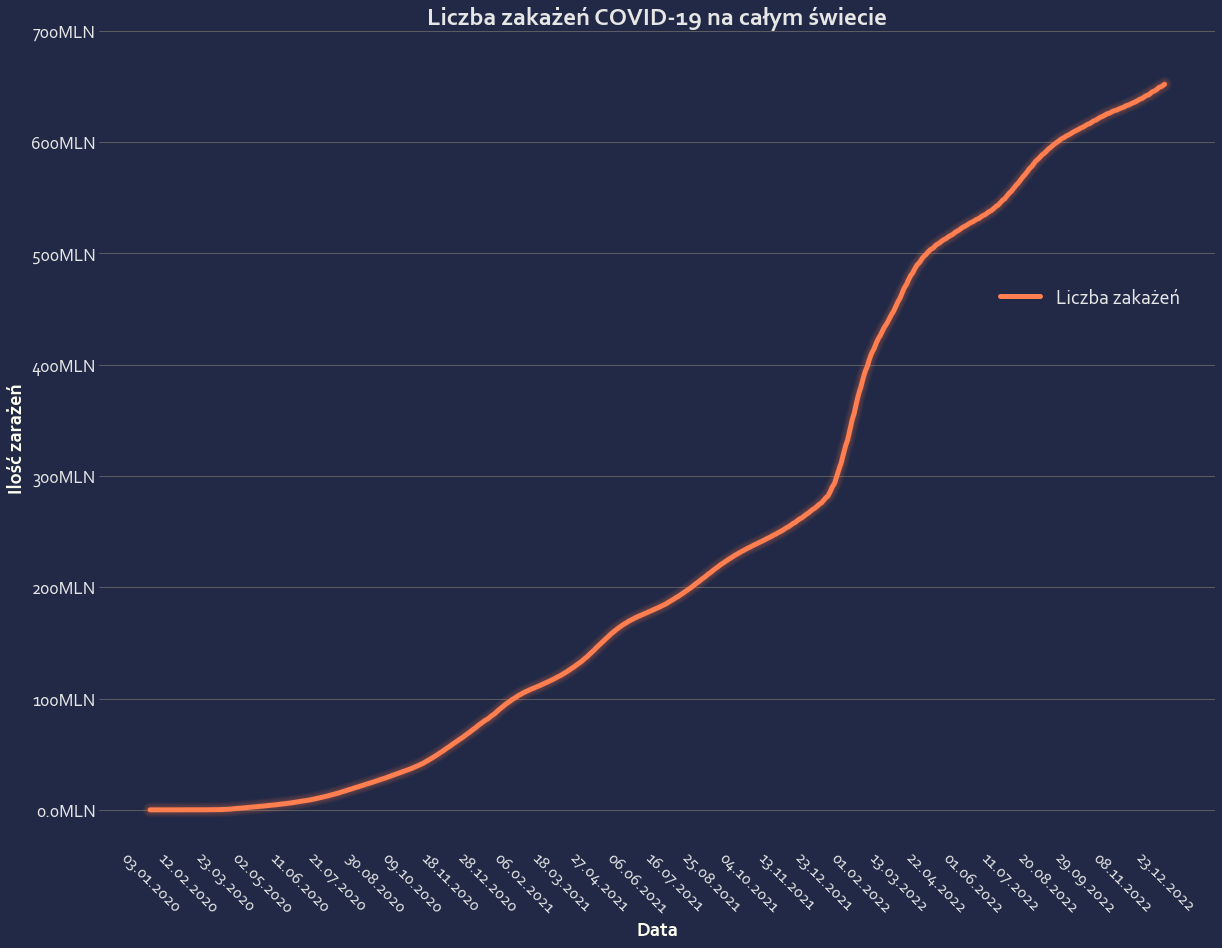

In [10]:
#ustawiam czcionkę dla całego wykresu
font = {'family' : 'Corbel'}
plt.rc('font', **font)

fig, ax = plt.subplots(figsize=(20, 15))
p1 = plt.plot(dates, cases,
         linewidth=5, color = kolor1)

ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: str(x)[0:3] + "MLN"))

ax.xaxis.grid(False) # vertical lines

plt.tick_params(axis='x',labelsize=17,rotation=-45)
plt.tick_params(axis='y',labelsize=18)
plt.xticks(x_labels, changed_labels)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are off

plt.tick_params(left = False)

ax.spines[['right', 'top', 'bottom', 'left']].set_visible(False)
plt.grid(axis='y', color='dimgray')

plt.ylim(top=700000000)
plt.ylabel('Ilość zarażeń', fontsize = 20, fontweight = 'bold', color = 'ivory')
plt.xlabel('Data', fontsize = 20, fontweight = 'bold', color = 'ivory')

mplcyberpunk.make_lines_glow(ax)

plt.title('Liczba zakażeń COVID-19 na całym świecie', fontsize = 25, fontweight = 'bold')

ax.legend([p1[0]], ['Liczba zakażeń'], fontsize = 20, facecolor = 'dimgray', framealpha = 0.4, loc = [0.8, 0.65])

# plt.savefig('covid_cases.png')
plt.show()

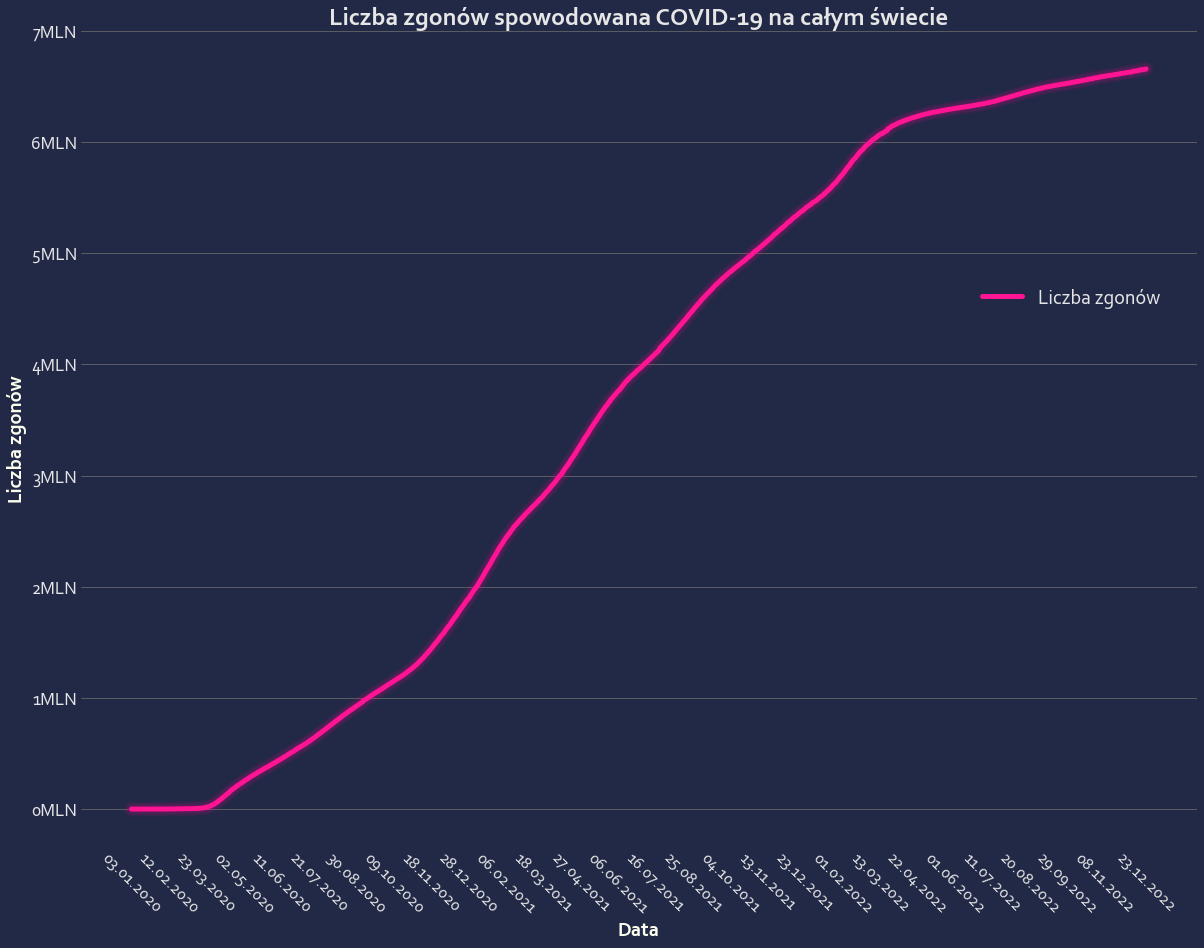

In [11]:
#ustawiam czcionkę dla całego wykresu
font = {'family' : 'Corbel'}
plt.rc('font', **font)

fig, ax = plt.subplots(figsize=(20, 15))
p1 = plt.plot(dates, deaths,
         linewidth=5, color = kolor2)

ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: str(x)[0:1] + "MLN"))

plt.tick_params(left = False)

plt.tick_params(axis='x',labelsize=17,rotation=-45)
plt.tick_params(axis='y',labelsize=18)
plt.xticks(x_labels, changed_labels)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are off

ax.xaxis.grid(False) # vertical lines

ax.spines[['right', 'top', 'bottom', 'left']].set_visible(False)
plt.grid(axis='y', color='dimgray')

plt.ylim(top=7000000)
plt.ylabel('Liczba zgonów', fontsize = 20, fontweight = 'bold', color = 'ivory')
plt.xlabel('Data', fontsize = 20, fontweight = 'bold', color = 'ivory')

mplcyberpunk.make_lines_glow(ax)

plt.title('Liczba zgonów spowodowana COVID-19 na całym świecie', fontsize = 25, fontweight = 'bold')

ax.legend([p1[0]], ['Liczba zgonów'], fontsize = 20, facecolor = 'dimgray', framealpha = 0.4, loc = [0.8, 0.65])

# plt.savefig('covid_deaths.png')
plt.show()

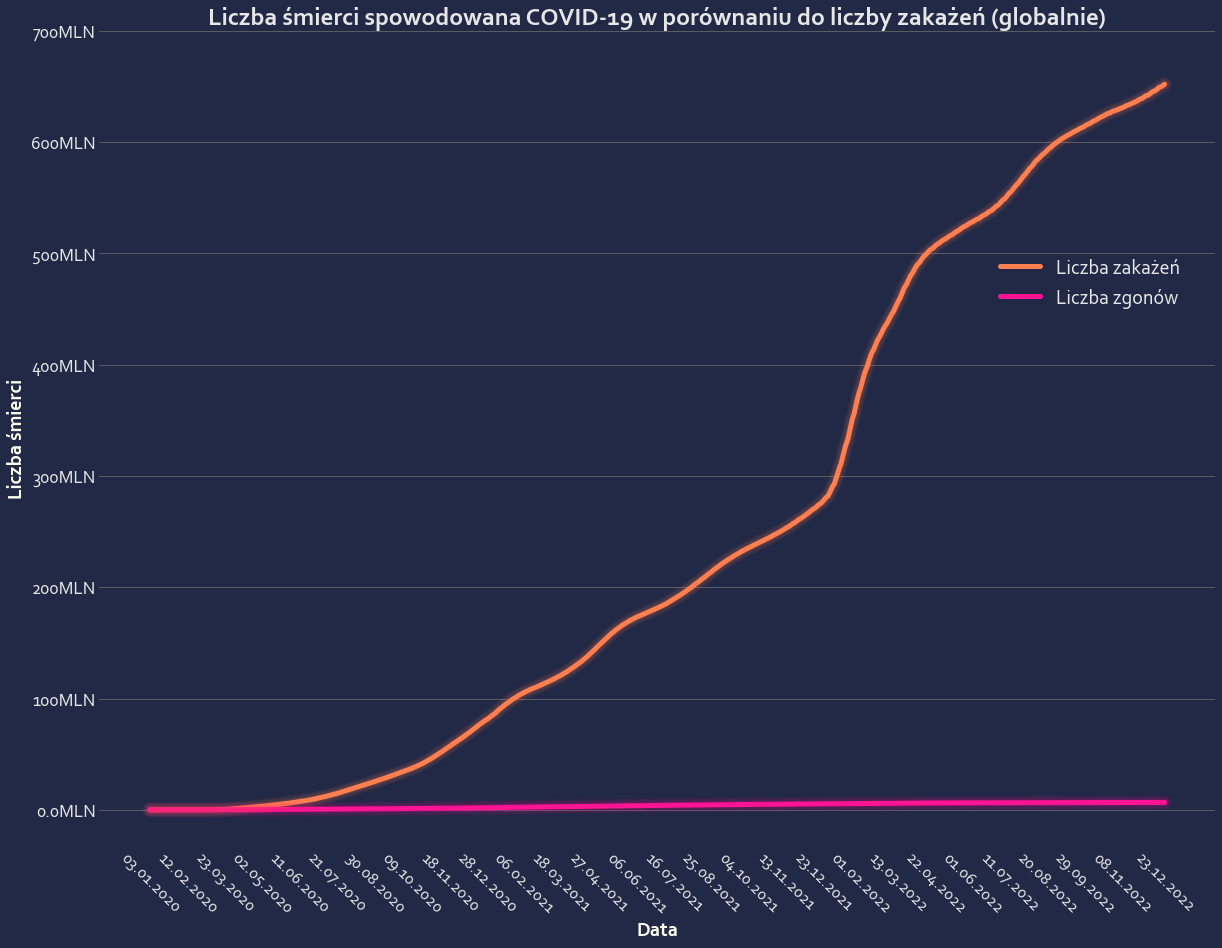

In [12]:
fig, ax = plt.subplots(figsize=(20, 15))
p1 = plt.plot(dates, cases,
         linewidth=5, color = kolor1)
p2 = plt.plot(dates, deaths,
         linewidth=5, color = kolor2)

ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: str(x)[0:3] + "MLN"))

plt.tick_params(axis='x',labelsize=17,rotation=-45)
plt.tick_params(axis='y',labelsize=18)
plt.xticks(x_labels, changed_labels)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are off

plt.tick_params(left = False)
ax.xaxis.grid(False) # vertical lines

ax.spines[['right', 'top', 'bottom', 'left']].set_visible(False)
plt.grid(axis='y', color='dimgray')

plt.ylim(top=700000000)
plt.ylabel('Liczba śmierci', fontsize = 20, fontweight = 'bold', color = 'ivory')
plt.xlabel('Data', fontsize = 20, fontweight = 'bold', color = 'ivory')

mplcyberpunk.make_lines_glow(ax)

#plt.tight_layout()

plt.title('Liczba śmierci spowodowana COVID-19 w porównaniu do liczby zakażeń (globalnie)', 
          fontsize = 25, fontweight = 'bold')

custom_lines = [Line2D([0], [0], color= kolor1, lw=5),
                Line2D([0], [0], color= kolor2, lw=5)]

ax.legend(custom_lines, ['Liczba zakażeń', 'Liczba zgonów'], fontsize = 20, facecolor = 'dimgray', framealpha = 0.4, loc = [0.8, 0.65])

# plt.savefig('covid_cases_vs_deaths.png')
plt.show()

### Źródła:
- baza danych informacji o zakażeniach: https://covid19.who.int/data